<a href="https://colab.research.google.com/github/soumyb09/soumyb09/blob/tensorflow/tf_regression_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import importlib
importlib.import_module('mpl_toolkits').__path__

_NamespacePath(['/usr/local/lib/python3.6/dist-packages/mpl_toolkits'])

In [36]:
!pip install matplotlib-venn

In [37]:
!apt-get -qq install -y libfluidsynth1

In [38]:
from mpl_toolkits.mplot3d import Axes3D

In [39]:
#Making dataset
N = 1000
X = np.random.random((N,2))* 6 - 3 #uniformly distrributed between (-3, +3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:,1])

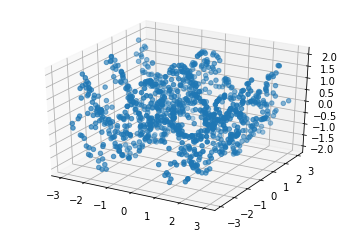

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0],X[:,1], Y);

In [42]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (2,)),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(1)
]) #building model

In [43]:
#compiling the model
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer= opt , 
              loss= 'mse')

In [44]:
r = model.fit(X, Y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 858us/step - loss: 0.9943
Epoch 2/100
32/32 [==============================] - 0s 829us/step - loss: 0.9184
Epoch 3/100
32/32 [==============================] - 0s 853us/step - loss: 0.9360
Epoch 4/100
32/32 [==============================] - 0s 828us/step - loss: 0.9021
Epoch 5/100
32/32 [==============================] - 0s 808us/step - loss: 0.8778
Epoch 6/100
32/32 [==============================] - 0s 823us/step - loss: 0.8406
Epoch 7/100
32/32 [==============================] - 0s 817us/step - loss: 0.8262
Epoch 8/100
32/32 [==============================] - 0s 922us/step - loss: 0.7689
Epoch 9/100
32/32 [==============================] - 0s 919us/step - loss: 0.6997
Epoch 10/100
32/32 [==============================] - 0s 815us/step - loss: 0.6703
Epoch 11/100
32/32 [==============================] - 0s 967us/step - loss: 0.5997
Epoch 12/100
32/32 [==============================] - 0s 857us/step - loss: 0.6096
Epoch 13/100


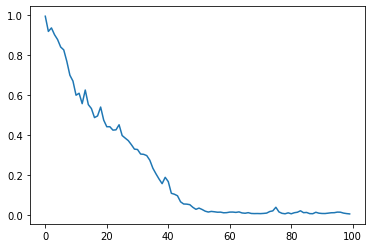

In [45]:
plt.plot(r.history['loss'], label = 'loss');

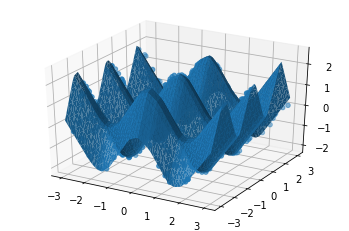

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased= True)
plt.show()

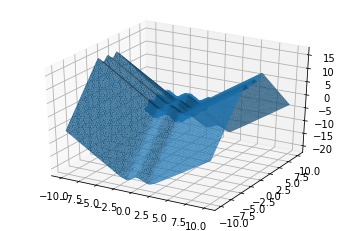

In [58]:
#extrapolation
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased= True)
plt.show()